In [26]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [27]:
desktops = pd.read_csv("data/desktops.csv")
notebooks = pd.read_csv("data/notebooks.csv")
computers = desktops.append(notebooks)

In [28]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 231
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   p_id              406 non-null    int64  
 1   category_name     406 non-null    object 
 2   p_source_id       406 non-null    int64  
 3   title             406 non-null    object 
 4   price             406 non-null    int64  
 5   brand             406 non-null    object 
 6   rating            406 non-null    int64  
 7   reviews_quantity  406 non-null    int64  
 8   cpu               406 non-null    object 
 9   cpu_rate          406 non-null    int64  
 10  hertz             389 non-null    float64
 11  cores             374 non-null    float64
 12  gpu               406 non-null    object 
 13  gpu_rate          406 non-null    float64
 14  ram               398 non-null    float64
 15  ram_type          217 non-null    object 
 16  ssd               384 non-null    object 
 1

In [29]:
computers[computers.ram.isna()].count()

p_id                8
category_name       8
p_source_id         8
title               8
price               8
brand               8
rating              8
reviews_quantity    8
cpu                 8
cpu_rate            8
hertz               2
cores               2
gpu                 8
gpu_rate            8
ram                 0
ram_type            1
ssd                 8
drive_size          8
url                 8
dtype: int64

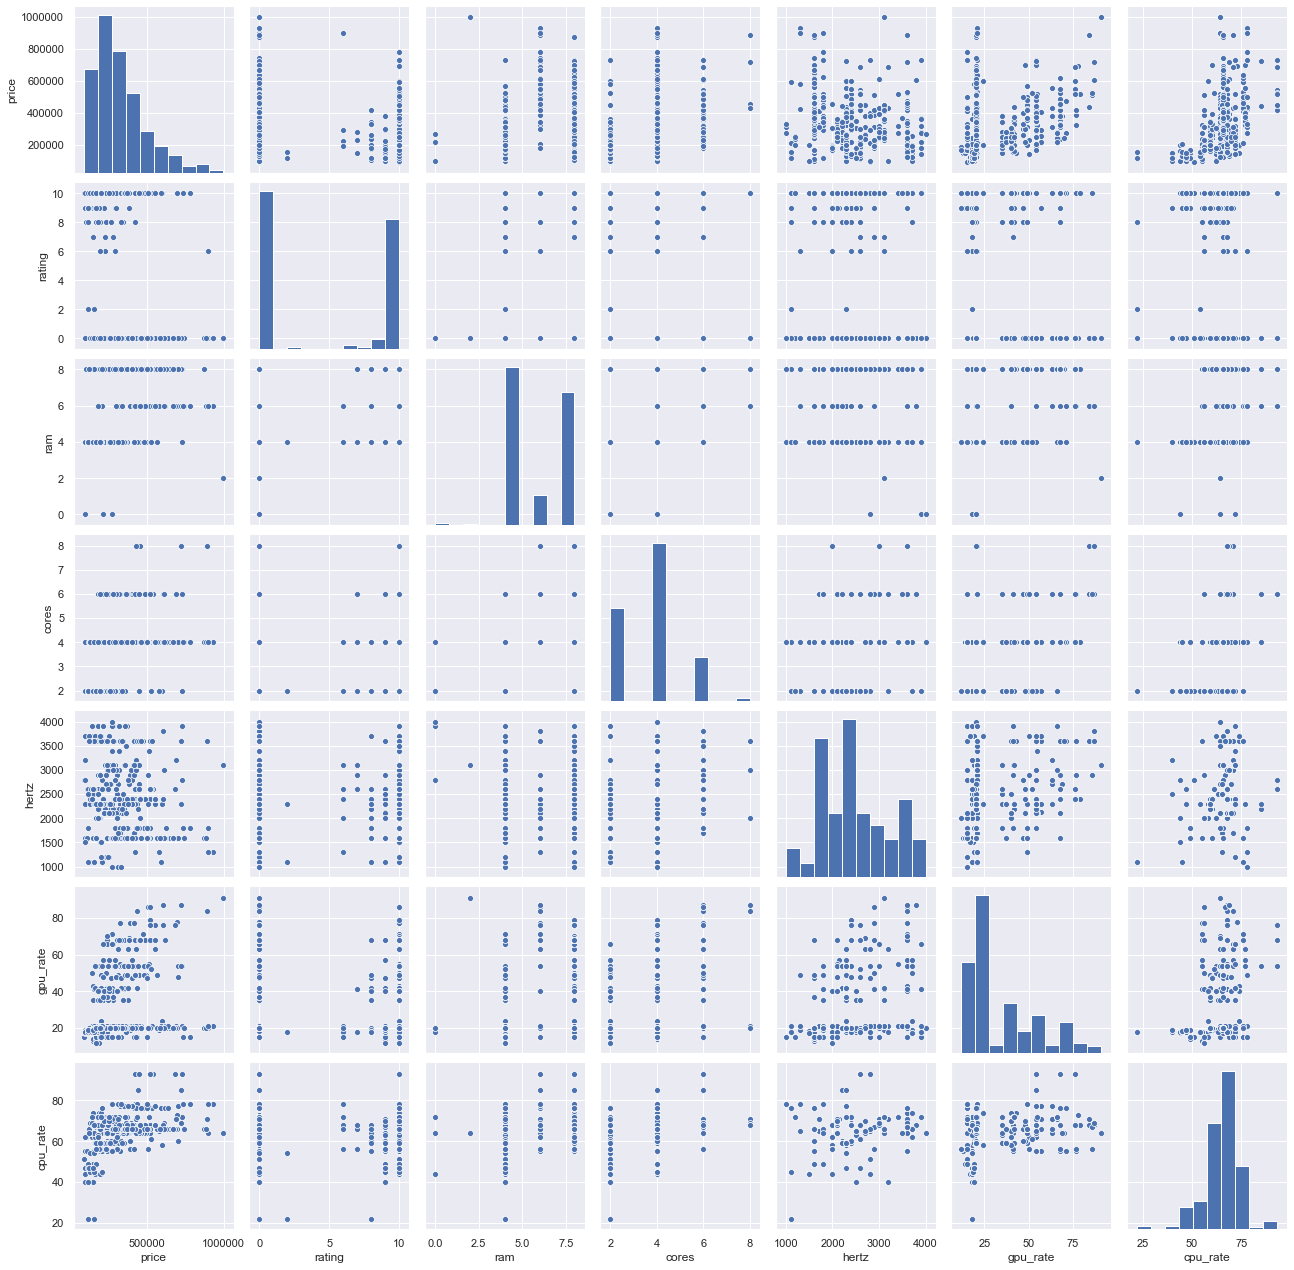

In [33]:
sns.pairplot(computers[["price", "rating", "ram", "cores", "hertz", "brand", "gpu_rate", "cpu_rate"]])

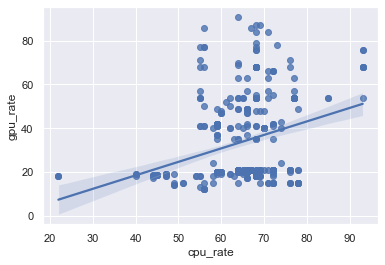

In [34]:
sns.regplot(computers.cpu_rate, computers.gpu_rate)

In [36]:
rated_computers = computers[computers.reviews_quantity > 0]

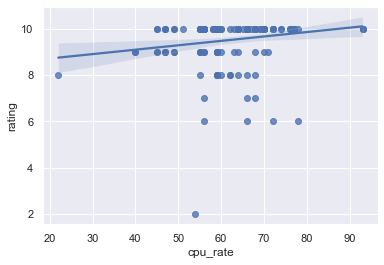

In [44]:
sns.regplot(rated_computers.cpu_rate, rated_computers.rating)

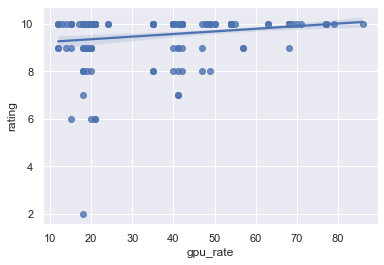

In [43]:
sns.regplot(rated_computers.gpu_rate, rated_computers.rating)

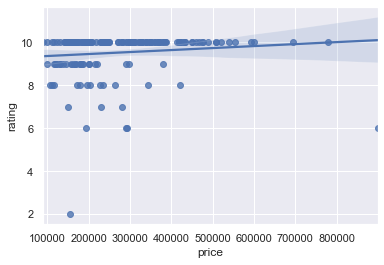

In [42]:
sns.regplot(rated_computers.price, rated_computers.rating)

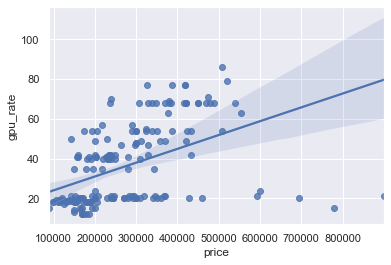

In [45]:
sns.regplot(rated_computers.price, rated_computers.gpu_rate)

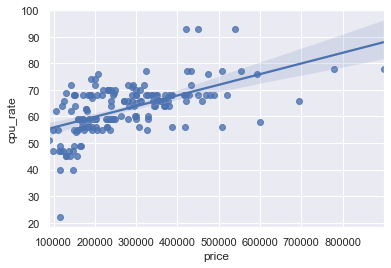

In [46]:
sns.regplot(rated_computers.price, rated_computers.cpu_rate)

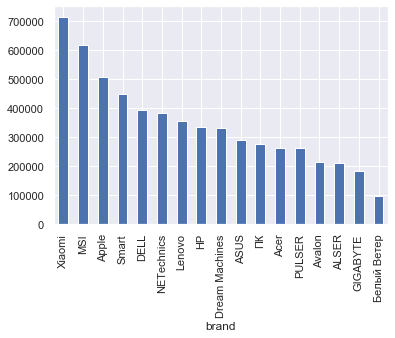

In [49]:
computers.groupby(computers.brand)["price"].mean().sort_values(ascending=False).plot.bar()

In [61]:
popular_computers = computers[computers.brand.isin(["Apple", "DELL", "Lenovo", "Xiaomi"])]

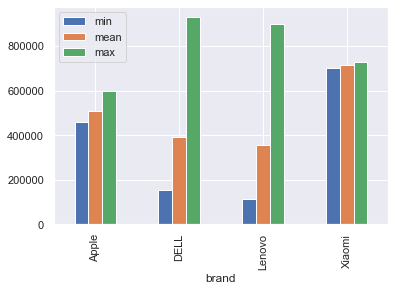

In [63]:
popular_computers.groupby(popular_computers.brand)["price"].agg(["min", "mean", "max"]).plot.bar()

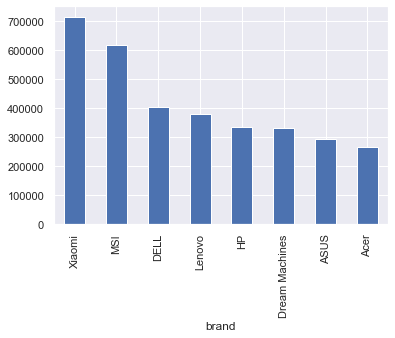

In [51]:
notebooks.groupby(notebooks.brand)["price"].mean().sort_values(ascending=False).plot.bar()

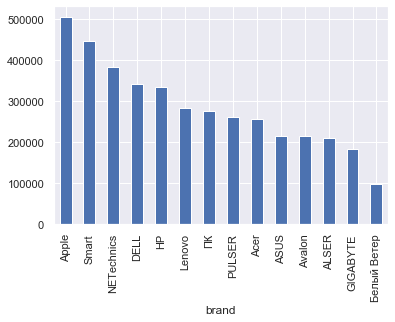

In [55]:
desktops.groupby(desktops.brand)["price"].mean().sort_values(ascending=False).plot.bar()

In [50]:
computers[computers.price == computers.price.max()]

,p_id,category_name,p_source_id,title,price,brand,rating,reviews_quantity,cpu,cpu_rate,hertz,cores,gpu,gpu_rate,ram,ram_type,ssd,drive_size,url
147,9145,desktops,100085447,PULSER Extreme 10 черный,998000,PULSER,0,0,amd ryzen 9 3900,64,3100.0,NaN,rtx 2080 super,91.0,2.0,NaN,True,2480.0,https://kaspi.kz/shop/p/pulser-extreme-10-cher...


In [54]:
notebooks[notebooks.price == notebooks.price.max()]

,p_id,category_name,p_source_id,title,price,brand,rating,reviews_quantity,cpu,cpu_rate,hertz,cores,gpu,gpu_rate,ram,ram_type,ssd,drive_size,url
167,9094,notebooks,100142836,DELL XPS 13 7390-2190 белый,929900,DELL,0,0,core i7 1065g7,78,1300.0,4.0,intel iris plus,21.0,6.0,LPDDR4x,True,512,https://kaspi.kz/shop/p/dell-xps-13-7390-2190-...
